In [1]:
# Pour afficher les graphiques dans la continuité du code, 
# et non pas dans une fenêtre à part:
%matplotlib inline

# Pour utiliser la fonction randint, qui génère des nombres
# entiers de façon aléatoire:
from random import randint, seed

# Un Enum est une structure de données qui consiste en un 
# ensemble d'éléments nommés. Une variable de ce type peut
# avoir comme valeur un de ces éléments.
from enum import Enum

# Pour pouvoir afficher des graphiques:
import matplotlib.pyplot as plt

In [2]:
# Ici nous définissons une sous-classe de Enum, qui contiendra 
# les stratégies possibles.
class Strategie(Enum):
    CHANGER = 1
    GARDER = 2
    RANDOM = 3

In [3]:
# Utilise l'horloge système pour initialiser le générateur de 
# nombres pseudo-aléatoires.
seed()

def play_game(strategie):
    '''Simule une partie du jeu Monty Hall.
    
    Cette fonction simule le choix de la porte par le participant, 
    l'élimination d'une mauvaise porte par le présentateur, et le 
    choix final. Elle ne retourne que le résultat de la partie, parce 
    que nous n'aurons besoin que du résultat pour effectuer nos calculs.
    
    Args:
        strategie (Strategie): La stratégie du joueur
        
    Returns:
        bool: Le joueur a-t-il gagné?
    '''

    portes = [0, 1, 2]
    
    bonne_porte = randint(0,2)
    
    # Choix du joueur
    premier_choix = randint(0,2)
    
    # Il nous reste deux portes
    portes.remove(premier_choix)
    
    # Le présentateur élimine une porte
    if premier_choix == bonne_porte:
        portes.remove(portes[randint(0,1)])
    else:
        portes = [bonne_porte]
    
    deuxieme_choix = 0
    # Le deuxieme choix depend de la strategie
    if strategie == Strategie.CHANGER:
        deuxieme_choix = portes[0]
    elif strategie == Strategie.GARDER:
        deuxieme_choix = premier_choix
    elif strategie == Strategie.RANDOM:
        if randint(0,1):
            deuxieme_choix = portes[0]
        else:
            pass
    else:
        raise ValueError("Stratégie non reconnue!")
    
    return deuxieme_choix == bonne_porte      

In [4]:
play_game(Strategie.CHANGER)

True

In [5]:
def play(strategie, nb_tours):
    return [1 if play_game(strategie) else 0 for i in range(nb_tours)]

In [6]:
sum(play(Strategie.GARDER, 1000))

327

In [7]:
sum(play(Strategie.CHANGER, 1000))

651

In [8]:
sum(play(Strategie.RANDOM, 1000))

509

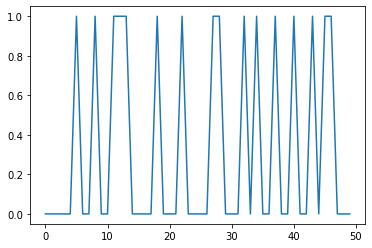

In [9]:
plt.plot(play(Strategie.GARDER, 50))

<BarContainer object of 3 artists>

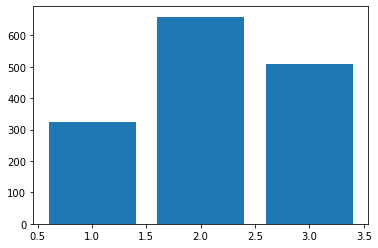

In [16]:
plt.bar([1,2,3],[sum(play(Strategie.GARDER, 1000)), sum(play(Strategie.CHANGER, 1000)), sum(play(Strategie.RANDOM, 1000))])

In [11]:
print("En changeant de porte, le joueur a gagné {} sur 10000 parties."
      .format(sum(play(Strategie.CHANGER, 10000))))
      
print("En gardant son choix initial, le joueur a gagné {} sur 10000 parties."
      .format(sum(play(Strategie.GARDER, 10000))))

En changeant de porte, le joueur a gagné 6635 sur 10000 parties.
En gardant son choix initial, le joueur a gagné 3343 sur 10000 parties.


In [12]:
gains_changer = []
gains_garder = []
gains_random = []
samples =  [1000, 10000, 20000, 50000, 80000, 100000]
for tours in samples:
    gains_changer.append(play(Strategie.CHANGER, tours))
    gains_random.append(play(Strategie.RANDOM, tours))
    gains_garder.append(play(Strategie.GARDER, tours))

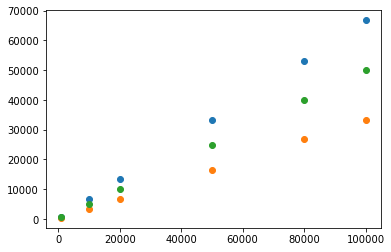

In [13]:
figure = plt.figure()
plot = plt.scatter(samples, [sum(x) for x in gains_changer])
plot = plt.scatter(samples, [sum(x) for x in gains_garder])
plot = plt.scatter(samples, [sum(x) for x in gains_random])

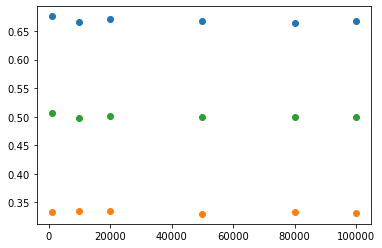

In [14]:
figure = plt.figure()
plot = plt.scatter(samples, [sum(gains_changer[i])/samples[i] for i in range(len(samples))])
plot = plt.scatter(samples, [sum(gains_garder[i])/samples[i] for i in range(len(samples))])
plot = plt.scatter(samples, [sum(gains_random[i])/samples[i] for i in range(len(samples))])